# Rio 2016 Olympics Dataset

This dataset includes the official statistics on the 11,538 athletes (6,333 men and 5,205 women) and 306 events at the 2016 Olympic Games in Rio de Janeiro. The data was taken from the `Rio 2016 website`, which has since been deleted. You can read more about that in a blog post.

## Dataset Information

#### Column definitions for `athletes.csv`

The athlete data is stored in [`athletes.csv`](https://raw.githubusercontent.com/flother/rio2016/master/athletes.csv); one athlete per row, and eleven columns. Empty cells are null values.

1. `id`
    * Athlete id
    * Integer between 1 and 1,000,000,000
    * Unique
    * No null values
2. `name`
    * Athlete's full name
    * String up to forty characters in length
    * Not unique
    * No null values
3. `nationality`
    * Athlete's nationality
    * One of the [IOC](https://www.olympic.org/the-ioc)'s 206 [three-letter country codes](https://en.wikipedia.org/wiki/List_of_IOC_country_codes), or `ROT` for members of the [Refugee Olympic Team](https://en.wikipedia.org/wiki/Refugee_Olympic_Team_at_the_2016_Summer_Olympics). Kuwaiti athletes' nationality is given as `IOA` due to the [suspension of the Kuwait Olympic Committee](https://www.olympic.org/news/suspension-of-the-kuwait-olympic-committee)
    * Not unique
    * No null values
4. `sex`
    * Athlete's sex
    * One of two lower-case string values:
        * `male`
        * `female`
    * Not unique
    * No null values
5. `date_of_birth`
    * Athlete's date of birth
    * `YYYY-MM-DD` format
    * Not unique
    * No null values
6. `height`
    * Athlete's height, in metres
    * Floating-point number
    * Not unique
    * Contains null values
7. `weight`
    * Athlete's weight, in kilograms
    * Integer
    * Not unique
    * Contains null values
8. `sport`
    * The sport in which the athlete competes, as defined by the [IOC](https://www.olympic.org/the-ioc)
    * One of 28 lower-case string values
        * `aquatics`
        * `archery`
        * `athletics`
        * `badminton`
        * `basketball`
        * `boxing`
        * `canoe`
        * `cycling`
        * `equestrian`
        * `fencing`
        * `football`
        * `golf`
        * `gymnastics`
        * `handball`
        * `hockey`
        * `judo`
        * `modern pentathlon`
        * `rowing`
        * `rugby sevens`
        * `sailing`
        * `shooting`
        * `table tennis`
        * `taekwondo`
        * `tennis`
        * `triathlon`
        * `volleyball`
        * `weightlifting`
        * `wrestling`
    * Not unique
    * No null values
9. `gold`
    * Number of gold medals won by the athlete
    * Integer
    * Not unique
    * No null values
10. `silver`
    * Number of silver medals won by the athlete
    * Integer
    * Not unique
    * No null values
11. `bronze`
    * Number of bronze medals won by the athlete
    * Integer
    * Not unique
    * No null values
12. `info`
    * Free-form English-language description of the athlete
    * String
    * Unique (excluding null values)
    * Contains null values

## Tasks

1. To Do Exploratory Data Analysis (EDA)
2. To Get Auxiliary and Aditional Datasets
3. Concat and Merge Datasets

## Question(s) to be Answered

1. Athletes with more medals
2. Athetes with more medals by sport
3. Athetes with more medal by sex
4. Countries with more medals
5. Countries with more medal by continent
6. Continents with more medals
7. Build a medal table
8. Events with more medals to give
9. Countries economic power vs amount of medals
10. Countries population vs amount of medals


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

## Loading Dataset

In [12]:
athletes = pd.read_csv('data/athletes.csv')

## Exploring Dataset

In [13]:
athletes.head()

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,NaN
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,NaN
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,NaN
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,NaN
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,NaN


In [14]:
athletes.tail()

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
11533,265605954,Zurian Hechavarria,CUB,female,1995-08-10,1.64,58.0,athletics,0,0,0,NaN
11534,214461847,Zuzana Hejnova,CZE,female,1986-12-19,1.73,63.0,athletics,0,0,0,NaN
11535,88361042,di Xiao,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0,NaN
11536,900065925,le Quoc Toan Tran,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0,NaN
11537,711404576,le Roux Hamman,RSA,male,1992-01-06,1.85,70.0,athletics,0,0,0,NaN


In [11]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11538 non-null  int64  
 1   name           11538 non-null  object 
 2   nationality    11538 non-null  object 
 3   sex            11538 non-null  object 
 4   date_of_birth  11538 non-null  object 
 5   height         11208 non-null  float64
 6   weight         10879 non-null  float64
 7   sport          11538 non-null  object 
 8   gold           11538 non-null  int64  
 9   silver         11538 non-null  int64  
 10  bronze         11538 non-null  int64  
 11  info           131 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


In [15]:
athletes.shape

(11538, 12)

In [16]:
athletes.isna().any()

id               False
name             False
nationality      False
sex              False
date_of_birth    False
height            True
weight            True
sport            False
gold             False
silver           False
bronze           False
info              True
dtype: bool

In [42]:
athletes.isnull().sum()


id                   0
name                 0
nationality          0
sex                  0
date_of_birth        0
height             330
weight             659
sport                0
gold                 0
silver               0
bronze               0
info             11407
dtype: int64

In [43]:
athletes[athletes['weight'].isnull()]

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
12,258556239,Abbas Qali,IOA,male,1992-10-11,NaN,NaN,aquatics,0,0,0,NaN
28,349871091,Abdelhafid Benchabla,ALG,male,1986-09-26,1.86,NaN,boxing,0,0,0,NaN
30,23564778,Abdelkader Chadi,ALG,male,1986-12-12,1.78,NaN,boxing,0,0,0,NaN
37,934545704,Abdelrahman Salah Orabi Abdelgawwad,EGY,male,1987-10-09,1.85,NaN,boxing,0,0,0,NaN
47,469953606,Abdoullah Bamoussa,ITA,male,1986-06-08,NaN,NaN,athletics,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11465,980866226,Zhaina Shekerbekova,KAZ,female,1989-12-17,1.54,NaN,boxing,0,0,0,NaN
11468,405483135,Zhanibek Alimkhanuly,KAZ,male,1993-04-01,1.82,NaN,boxing,0,0,0,NaN
11513,352983859,Zohir Kedache,ALG,male,1986-03-02,1.78,NaN,boxing,0,0,0,NaN
11514,424586991,Zohra Ez Zahraoui,MAR,female,1983-11-18,1.65,NaN,boxing,0,0,0,NaN


In [44]:
athletes.duplicated().sum()


0

In [45]:
athletes.gold.value_counts()

0    10919
1      584
2       27
3        5
4        2
5        1
Name: gold, dtype: int64

In [46]:
athletes.silver.value_counts()


0    10904
1      613
2       21
Name: silver, dtype: int64

In [47]:
athletes.bronze.value_counts()


0    10845
1      682
2       11
Name: bronze, dtype: int64

In [38]:
athletes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,11538.0,4.999885e+08,2.908648e+08,18347.00,2.450997e+08,5.002011e+08,7.539874e+08,9.999878e+08
height,11208.0,1.766260e+00,1.126556e-01,1.21,1.690000e+00,1.760000e+00,1.840000e+00,2.180000e+00
weight,10879.0,7.207253e+01,1.617478e+01,31.00,6.000000e+01,7.000000e+01,8.100000e+01,1.700000e+02
gold,11538.0,5.772231e-02,2.559099e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
silver,11538.0,5.676894e-02,2.391471e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
bronze,11538.0,6.101577e-02,2.433202e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


In [18]:
athl1 = athletes[['weight', 'height', 'nationality']]
athl1.head()

,weight,height,nationality
0,64.0,1.72,ESP
1,56.0,1.68,KOR
2,79.0,1.98,CAN
3,80.0,1.83,MDA
4,71.0,1.81,NZL


array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

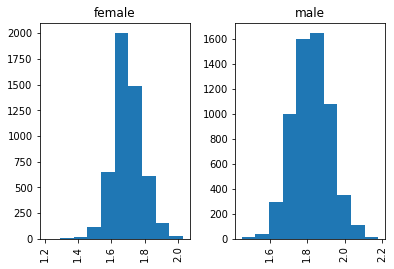

In [20]:
athletes.hist(by='sex', column='height')

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

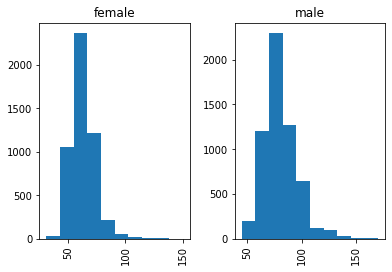

In [21]:
athletes.hist(by='sex', column='weight')


In [22]:
cubthl = athletes[athletes['nationality'] == 'CUB']
cubthl.head()

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
113,637015297,Adrian Andres Puentes Perez,CUB,male,1988-07-03,1.71,76.0,archery,0,0,0,NaN
116,839462979,Adrian Chacon,CUB,male,1988-12-10,1.87,90.0,athletics,0,0,0,NaN
119,679510102,Adrian Eduardo Goide Arredondo,CUB,male,1998-06-26,1.91,80.0,volleyball,0,0,0,NaN
126,714030791,Adrian Oquendo,CUB,male,1990-02-23,1.89,87.0,rowing,0,0,0,NaN
298,440339638,Alejandro Enrique Valdes Tobier,CUB,male,1988-11-18,1.65,65.0,wrestling,0,0,0,NaN


In [24]:
cubthl.describe().T

,count,mean,std,min,25%,50%,75%,max
id,123.0,5.286197e+08,3.066251e+08,5862724.00,2.724656e+08,5.316661e+08,8.314524e+08,9.933646e+08
height,122.0,1.772049e+00,1.274994e-01,1.43,1.680000e+00,1.775000e+00,1.867500e+00,2.020000e+00
weight,112.0,7.503571e+01,1.477515e+01,41.00,6.500000e+01,7.450000e+01,8.400000e+01,1.300000e+02
gold,123.0,4.065041e-02,1.982867e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
silver,123.0,1.626016e-02,1.269917e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
bronze,123.0,3.252033e-02,1.781029e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [32]:
# Sports with more medals to fight for
athletes[athletes['gold'] >= 1].groupby('sport').count().sort_values('id', ascending=False)

,id,name,nationality,sex,date_of_birth,height,weight,gold,silver,bronze,info
sport,,,,,,,,,,,
aquatics,99,99,99,99,99,98,98,99,99,99,9
athletics,60,60,60,60,60,58,58,60,60,60,4
rowing,48,48,48,48,48,48,48,48,48,48,2
football,36,36,36,36,36,36,36,36,36,36,1
hockey,34,34,34,34,34,34,34,34,34,34,0
handball,29,29,29,29,29,29,29,29,29,29,0
volleyball,28,28,28,28,28,28,28,28,28,28,0
gymnastics,25,25,25,25,25,25,25,25,25,25,4
rugby sevens,25,25,25,25,25,25,25,25,25,25,1


In [37]:
athletes.groupby(['gold']).count().sort_values('id', ascending=False)


,id,name,nationality,sex,date_of_birth,height,weight,sport,silver,bronze,info
gold,,,,,,,,,,,
0,10919,10919,10919,10919,10919,10592,10277,10919,10919,10919,81
1,584,584,584,584,584,581,567,584,584,584,39
2,27,27,27,27,27,27,27,27,27,27,6
3,5,5,5,5,5,5,5,5,5,5,2
4,2,2,2,2,2,2,2,2,2,2,2
5,1,1,1,1,1,1,1,1,1,1,1


In [33]:
athletes.groupby(['sport', 'gold']).count()

id  name  nationality   sex  date_of_birth  height  \
sport         gold                                                         
aquatics      0     1346  1346         1346  1346           1346    1298   
              1       85    85           85    85             85      84   
              2       10    10           10    10             10      10   
              3        2     2            2     2              2       2   
              4        1     1            1     1              1       1   
...                  ...   ...          ...   ...            ...     ...   
volleyball    1       28    28           28    28             28      28   
weightlifting 0      243   243          243   243            243     243   
              1       15    15           15    15             15      15   
wrestling     0      335   335          335   335            335     332   
              1       18    18           18    18             18      18   

                    weight  silver  bronze  info  
sport         gold                                
aquatics      0       1301    1346    1346    10  
              1         84      85      85     5  
              2         10      10      10     2  
              3          2       2       2     0  
              4          1       1       1     1  
...                    ...     ...     ...   ...  
volleyball    1         28      28      28     0  
weightlifting 0        243     243     243     1  
              1         15      15      15     0  
wrestling     0        331     335     335     1  
              1         18      18      18     2  

[72 rows x 10 columns]

In [21]:
cubthl[cubthl['gold'] == 1].groupby(['sport']).count()

,id,name,nationality,sex,date_of_birth,height,weight,gold,silver,bronze,info
sport,,,,,,,,,,,
boxing,3,3,3,3,3,3,0,3,3,3,0
wrestling,2,2,2,2,2,2,2,2,2,2,1


C:\Users\Alexei-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

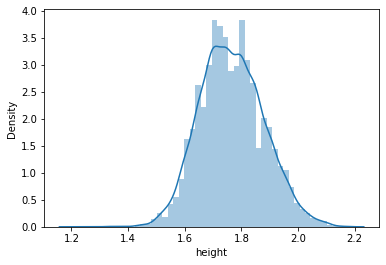

In [22]:
sns.distplot(athletes['height'])

C:\Users\Alexei-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

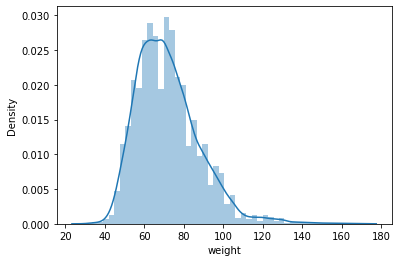

In [23]:
sns.distplot(athletes['weight'])


<AxesSubplot:xlabel='gold', ylabel='Count'>

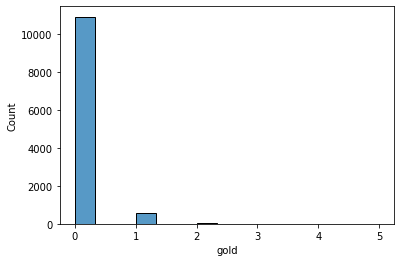

In [24]:
sns.histplot(athletes['gold'])

In [25]:
athletes[athletes['gold'] == 1]


,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
14,162792594,Abbey Weitzeil,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0,NaN
60,746318262,Abdulrashid Sadulaev,RUS,male,1996-05-09,1.77,86.0,wrestling,1,0,0,NaN
85,561951036,Adam Peaty,GBR,male,1994-12-28,1.93,88.0,aquatics,1,1,0,NaN
160,638298176,Agustin Mazzilli,ARG,male,1989-06-20,1.73,77.0,hockey,1,0,0,NaN
164,213448220,Ahmad Abughaush,JOR,male,1996-02-01,1.78,68.0,taekwondo,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11419,51119392,Yusuke Tanaka,JPN,male,1989-11-29,1.66,57.0,gymnastics,1,0,0,NaN
11457,879954351,Zeca,BRA,male,1994-05-16,1.70,69.0,football,1,0,0,NaN
11477,920733515,Zhen Wang,CHN,male,1991-08-24,1.75,55.0,athletics,1,0,0,NaN
11487,334126873,Zhiyong Shi,CHN,male,1993-10-10,1.68,69.0,weightlifting,1,0,0,NaN


In [26]:
athletes[athletes['sport'] == 'aquatics']


,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
7,382571888,Aaron Younger,AUS,male,1991-09-25,1.93,100.0,aquatics,0,0,0,NaN
12,258556239,Abbas Qali,IOA,male,1992-10-11,NaN,NaN,aquatics,0,0,0,NaN
14,162792594,Abbey Weitzeil,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0,NaN
26,189931373,Abdelaziz Mohamed Ahmed,SUD,male,1994-10-12,1.81,72.0,aquatics,0,0,0,NaN
45,702606719,Abdoul Khadre Mbaye Niane,SEN,male,1988-08-20,1.90,90.0,aquatics,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11500,274387882,Ziv Kalontarov,ISR,male,1997-01-15,1.85,71.0,aquatics,0,0,0,NaN
11503,593183472,Zivko Gocic,SRB,male,1982-08-22,1.93,93.0,aquatics,1,0,0,NaN
11507,446963221,Zoe Arancini,AUS,female,1991-07-14,1.70,70.0,aquatics,0,0,0,NaN
11512,371106012,Zohar Shikler,ISR,female,1997-07-08,1.78,61.0,aquatics,0,0,0,NaN


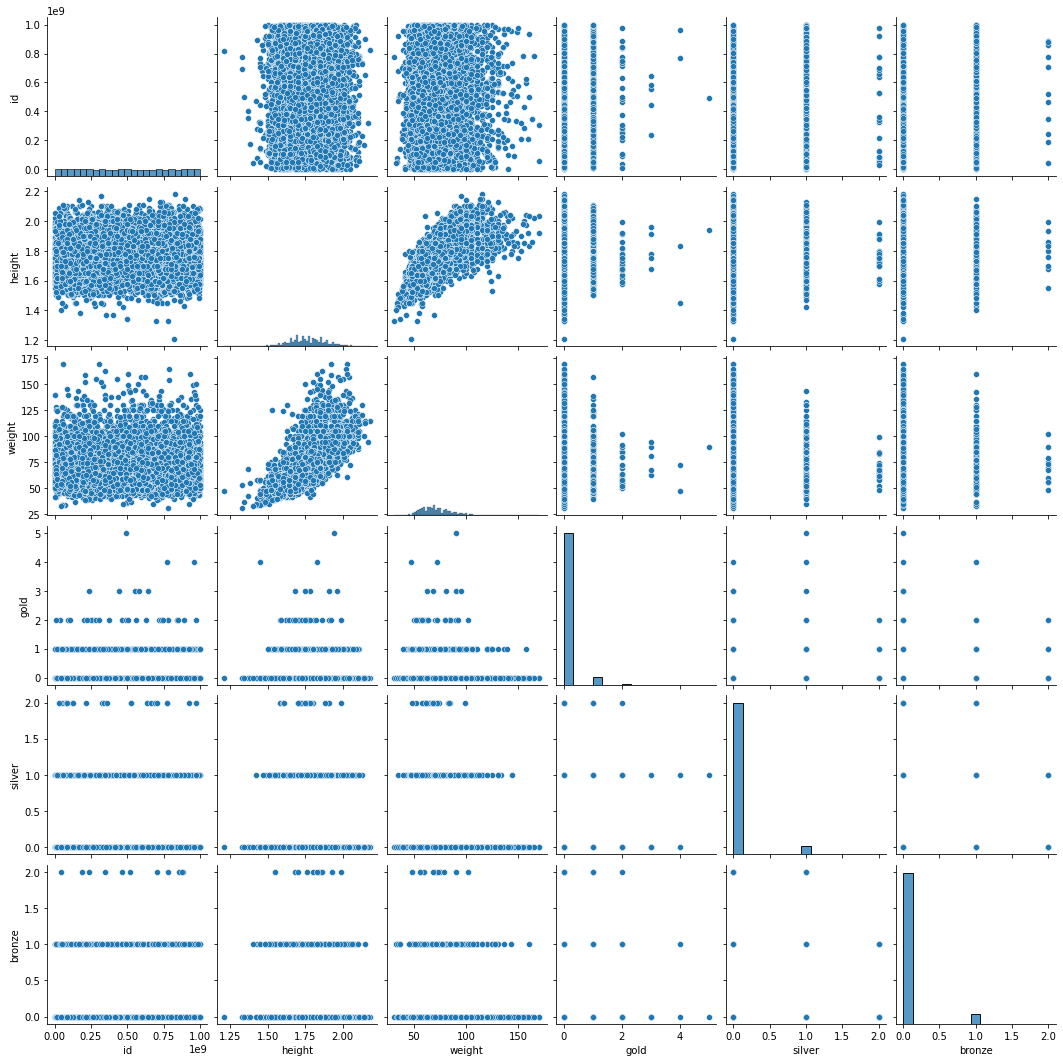

In [27]:
sns.pairplot(athletes)


In [28]:
corr = athletes.corr()
corr

,id,height,weight,gold,silver,bronze
id,1.000000,0.004063,0.003199,0.008290,-0.020803,0.011978
height,0.004063,1.000000,0.759588,0.048593,0.041073,0.020927
weight,0.003199,0.759588,1.000000,0.035799,0.030885,0.026051
gold,0.008290,0.048593,0.035799,1.000000,0.024349,0.004682
silver,-0.020803,0.041073,0.030885,0.024349,1.000000,-0.014844
bronze,0.011978,0.020927,0.026051,0.004682,-0.014844,1.000000


<AxesSubplot:>

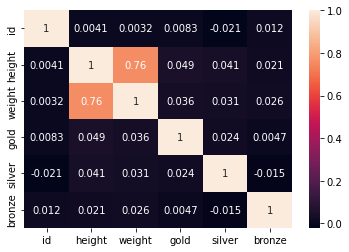

In [29]:
sns.heatmap(corr, annot=True)

In [32]:
athletes.groupby('nationality')['nationality'].count().sort_values(ascending=False)

nationality
USA    567
BRA    485
GER    441
AUS    431
FRA    410
      ... 
DMA      2
SOM      2
GEQ      2
NRU      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [33]:
athletes.groupby('gold')['name'].count()

gold
0    10919
1      584
2       27
3        5
4        2
5        1
Name: name, dtype: int64

In [43]:
athletes[athletes['gold'] >= 2].sort_values(by='gold', ascending=False)

,id,name,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze,info
7401,491565031,Michael Phelps,USA,male,1985-06-30,1.94,90.0,aquatics,5,1,0,The USA's Michael Phelps has claimed 22 Olympi...
9895,770111957,Simone Biles,USA,female,1997-03-14,1.45,47.0,gymnastics,4,0,1,With the most world championship artistic gymn...
5550,960103057,Katie Ledecky,USA,female,1997-03-17,1.83,72.0,aquatics,4,1,0,She burst onto the scene at London 2012 by win...
4680,441111357,Jason Kenny,GBR,male,1988-03-23,1.78,81.0,cycling,3,0,0,NaN
9311,237391684,Ryan Murphy,USA,male,1995-07-02,1.91,90.0,aquatics,3,0,0,NaN
10694,579416064,Usain Bolt,JAM,male,1986-08-21,1.96,95.0,athletics,3,0,0,One of the most charismatic – and fastest – at...
2393,552666305,Danuta Kozak,HUN,female,1987-01-11,1.68,63.0,canoe,3,0,0,Eleven-time world champion Danuta Kozák won tw...
5554,643664378,Katinka Hosszu,HUN,female,1989-05-03,1.75,68.0,aquatics,3,1,0,NaN
7882,102725469,Natalia Ishchenko,RUS,female,1986-04-08,1.77,56.0,aquatics,2,0,0,"With a total of 19 world championship medals, ..."
7936,776128059,Nathan Adrian,USA,male,1988-12-07,1.99,102.0,aquatics,2,0,2,NaN


In [51]:
athletes.groupby(['gold', 'nationality'])['nationality'].count().sort_values(ascending=False)

gold  nationality
0     USA            448
      BRA            448
      AUS            408
      GER            395
      FRA            390
                    ... 
1     PUR              1
      SIN              1
      ETH              1
      TJK              1
5     USA              1
Name: nationality, Length: 282, dtype: int64

In [10]:
res = requests.get('https://restcountries.com/v3.1/name/cuba').json()
for k,v in res[0].items():
    print(f'{k}: {v}')

name: {'common': 'Cuba', 'official': 'Republic of Cuba', 'nativeName': {'spa': {'official': 'República de Cuba', 'common': 'Cuba'}}}
tld: ['.cu']
cca2: CU
ccn3: 192
cca3: CUB
cioc: CUB
independent: True
status: officially-assigned
unMember: True
currencies: {'CUC': {'name': 'Cuban convertible peso', 'symbol': '$'}, 'CUP': {'name': 'Cuban peso', 'symbol': '$'}}
idd: {'root': '+5', 'suffixes': ['3']}
capital: ['Havana']
altSpellings: ['CU', 'Republic of Cuba', 'República de Cuba']
region: Americas
subregion: Caribbean
languages: {'spa': 'Spanish'}
translations: {'ara': {'official': 'جمهورية كوبا', 'common': 'كوبا'}, 'ces': {'official': 'Kubánská republika', 'common': 'Kuba'}, 'cym': {'official': 'Gweriniaeth Ciwba', 'common': 'Ciwba'}, 'deu': {'official': 'Republik Kuba', 'common': 'Kuba'}, 'est': {'official': 'Kuuba Vabariik', 'common': 'Kuuba'}, 'fin': {'official': 'Kuuban tasavalta', 'common': 'Kuuba'}, 'fra': {'official': 'République de Cuba', 'common': 'Cuba'}, 'hrv': {'official': '